# **Aula 4 - Policy Evaluation**

Bem-vindo ao notebook da nossa aula sobre a implementação das Bellman Equations para RL! 

Neste notebook vamos realizar as implementações dos algoritmos numéricos para solução das Bellman equations. 

O problema que vamos explorar é o exemplo apresentado na aula: *gridworld random-walk*. Neste problema temos a seguinte cenário: devemos encontrar o menor caminho para as extremidades de um grid 4x4 (posição (0,0) e posição (3,3)), como exemplificado na imagem.

Note que os estados (0,0) e (3,3) são estados terminais. Desta forma, não existem ações a serem tomadas a partir destes.

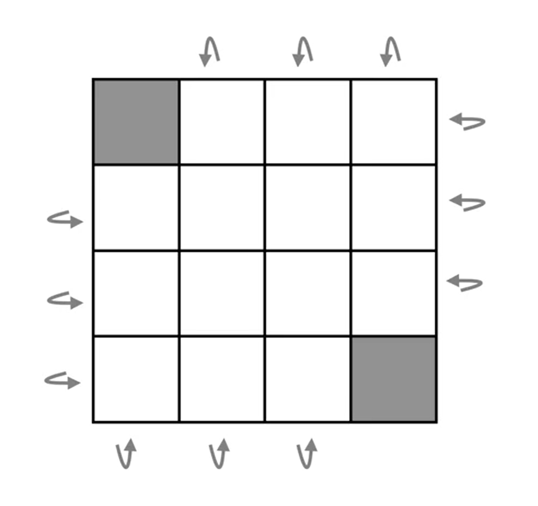

Quando o agente encontra uma borda, e executa um passo nesta direção, ele permanece na mesma célula. Por exemplo, ao atingir o estado (0,3), e se movimenta para a direita, ele permanece na célula (0,3).

O conjunto de possíveis estados, ou nosso conjunto $S$, são as posições no grid que o agente pode se posicionar:


In [ ]:
import numpy as np

S = [(0,0), (0,1), (0,2), (0,3),
     (1,0), (1,1), (1,2), (1,3),
     (2,0), (2,1), (2,2), (2,3),
     (3,0), (3,1), (3,2), (3,3)]

Devemos representar a função-valor para cada um dos estados durante o processo de avaliação da política. 

Desta forma, organizamos $V$ em uma matriz bi-dimensional com mesma estrutura do nosso grid de estados. Os valores de $V$ são inicializados com zero.

In [ ]:
grid_size = 4

V = np.zeros((grid_size,grid_size))
V

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Para simplificar o entendimento do processo de otimização, considere que a recompensa $R = -1$ para todos os estados. Isso nos diz que queremos que o agente se movimente o mínimo possível para alcançar um dos estados terminais.

Também por simplicidade, consideramos $\gamma = 1$. A variável utilizada para controle da convergência do método é dada por $\theta = 0.001$

In [ ]:
r = -1
gamma = 1
theta = 0.001

### Política

Ao final, a política é o que queremos de fato encontrar. Em problemas de RL, nosso foco é encontrar uma política ótima que possa ser usada para coordenar a movimentação do agente garantindo uma boa combinação de retornos de curto e longo prazo, sendo os compromissos de longo prazo mais interessantes de uma forma geral.

Nossa política $\pi$ é inicialmente definida de maneira uniforme. Ou seja, para cada um dos estados $s \in S$, a política de movimentação associada será uma tupla que representa a probabilidade do agente se mover para uma das direções: cima, baixo, esquerda, direita. Guarde esta ordem que será importante para as implementações. Desta forma, temos uma chance de 25% do agente se locomover em cada uma destas direções. 

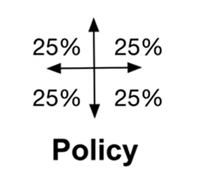

Do ponto de vista computacional, teremos:

In [ ]:
pi = np.array([[(0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25)],
               [(0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25)],
               [(0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25)],
               [(0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25), (0.25,0.25,0.25,0.25)]])

Vamos implementar uma função auxiliar para retornar as possíveis ações (no nosso caso, uma lista de estados) para um determinado `s_prime`. 



In [ ]:
def get_actions(s_prime):
  up_0 = s_prime[0] - 1 if s_prime[0] - 1 >= 0 else s_prime[0]
  up_1 = s_prime[1]

  down_0 = s_prime[0] + 1 if s_prime[0] + 1 < grid_size else s_prime[0]
  down_1 = s_prime[1]

  left_0 = s_prime[0]
  left_1 = s_prime[1] - 1 if s_prime[1] - 1 >= 0 else s_prime[1]

  right_0 = s_prime[0]
  right_1 = s_prime[1] + 1 if s_prime[1] + 1 < grid_size else s_prime[1]

  return [(up_0, up_1), (down_0, down_1), (left_0, left_1), (right_0, right_1)]

In [ ]:
# Use esta célula para debugar o código e entender o comportamento de `get_actions`.
s_prime = (0,1)
actions = get_actions(s_prime)
print(actions)

s_prime = (0,3)
actions = get_actions(s_prime)
print(actions)

s_prime = (3,0)
actions = get_actions(s_prime)
print(actions)

[(0, 1), (1, 1), (0, 0), (0, 2)]
[(0, 3), (1, 3), (0, 2), (0, 3)]
[(2, 0), (3, 0), (3, 0), (3, 1)]


# Policy Evaluation

Vamos implementar a equação de Bellman no contexto da avaliação da política $\pi$. Nossa política $\pi$ (no código, a matriz de tuplas `pi`), é nosso objetivo final de aprendizado. 

Para entender o quão bom a política atual `pi` se porta diante das condições atuais do ambiente, implementaremos o algoritmo apresentado em aula (revise o pseudo-algoritmo da seção *Policy Evaluation & Policy Iteration*):


In [ ]:
def evaluate_policy(S, V, pi, gamma, theta):
  error = []
  while True:
    delta = 0
    V_prime = np.zeros((grid_size,grid_size))
    for s in S:
      # Desconsiderando valores para os estados terminais.
      if s == (0,0) or s == (3,3): continue
      V_prime[s] = bellman_update(V, pi, s, gamma)
      delta = max(delta, abs(V_prime[s] - V[s]))
    V = V_prime
    error.append(delta)
    if delta < theta:
      break
  return V, error

Agora é sua vez de implementar a atualização de Bellman.

Lembre-se da regra de atualização:

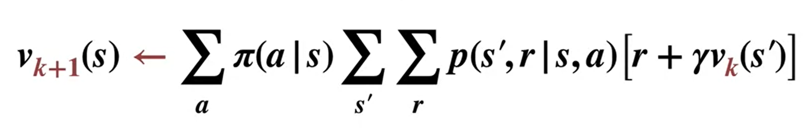

In [ ]:
# TAREFA DE IMPLEMENTAÇÃO
def bellman_update(V, pi, s, gamma):
  # INÍCIO DO CÓDIGO
  raise NotImplementedError()
  # FIM DO CÓDIGO
  return V_prime

In [ ]:
# Célula de teste.
# Esperamos aqui os mesmos resultados apresentados nos slides.
# State Value-function para célula (0,1)
s_01 = (0,1)
test_01 = bellman_update(V, pi, s_01, gamma)
print(test_01)
assert test_01 == -1.0

NotImplementedError: ignored

In [ ]:
# Célula de teste. 
# Primeira iteração do algoritmo.
V = np.zeros((grid_size,grid_size))
V_prime = np.zeros((grid_size,grid_size))
for s in S:
  if s == (0,0) or s == (3,3): continue
  V_prime[s] = bellman_update(V, pi, s, gamma)
V = V_prime
print(V)
V_final_correct = np.array([[ 0., -1., -1., -1.],
                            [-1., -1., -1., -1.],
                            [-1., -1., -1., -1.],
                            [-1., -1., -1.,  0.]])
assert np.array_equal(V, V_final_correct)

# Segunda iterações do algoritmo.
V_prime = np.zeros((grid_size,grid_size))
for s in S:
  if s == (0,0) or s == (3,3): continue
  V_prime[s] = bellman_update(V, pi, s, gamma)
V = V_prime
print(V)
V_final_correct = np.array([[ 0., -1.75, -2., -2.],
                            [-1.75, -2., -2., -2.],
                            [-2., -2., -2., -1.75],
                            [-2., -2., -1.75,  0.]])
assert np.array_equal(V, V_final_correct)

## Evaluate Policy

Caso você tenha chegado até aqui sem maiores problemas, parabéns!

Agora vamos testar o algoritmo até o critério de convergência dada a política $\pi$.

In [ ]:
V, error = evaluate_policy(S, V, pi, gamma, theta)
V = np.around(V)
print(V)
V_final_correct = np.array([[  0., -14., -20., -22.],
                            [-14., -18., -20., -20.],
                            [-20., -20., -18., -14.],
                            [-22., -20., -14.,   0.]])
assert np.array_equal(V, V_final_correct)

In [ ]:
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(0,len(error))
y = error
 
# plotting
plt.title("Iterative Policy Evaluation")
plt.xlabel("Steps")
plt.ylabel("Error")
plt.plot(x, y, color ="red")
plt.show()